In [1]:
#no meu caso, como utilizo o google colab, devo instalar e atualizar as libs statsmodels e sktime dessa maneira
!pip install --upgrade statsmodels
!pip install sktime
#caso esteja utilizando anaconda, você pode instalar o sktime e statsmodels da seguinte maneira 
#sktime - conda install -c conda-forge sktime-all-extras
#pip install statsmodels

     |████████████████████████████████| 9.8 MB 26.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 6.6 MB 11.7 MB/s 
     |████████████████████████████████| 3.3 MB 36.2 MB/s 
     |████████████████████████████████| 34.5 MB 13 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [2]:
#Aqui importamos todas as libs que serão necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sktime.forecasting.theta import ThetaForecaster
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError

In [89]:
#Aqui carregamos o dado disponibilizada pela lib statsmodels
y = load_airline()
#Aqui fazemos a divisão dos dados para treino e teste do modelo e verificamos o tamanho de cada conjunto
y_train, y_test = temporal_train_test_split(y)
print("Tamanho do conjunto de treino: ", len(y_train))
print("Tamanho do conjunto de teste: ", len(y_test))

Tamanho do conjunto de treino:  108
Tamanho do conjunto de teste:  36


In [ ]:
y.plot()

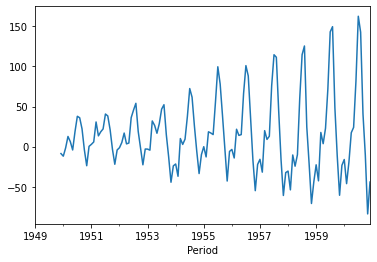

In [34]:
(y - y.rolling(12).mean()).plot()

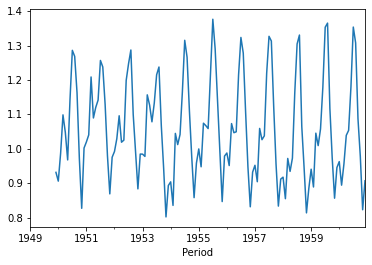

In [35]:
(y / y.rolling(12).mean()).plot()

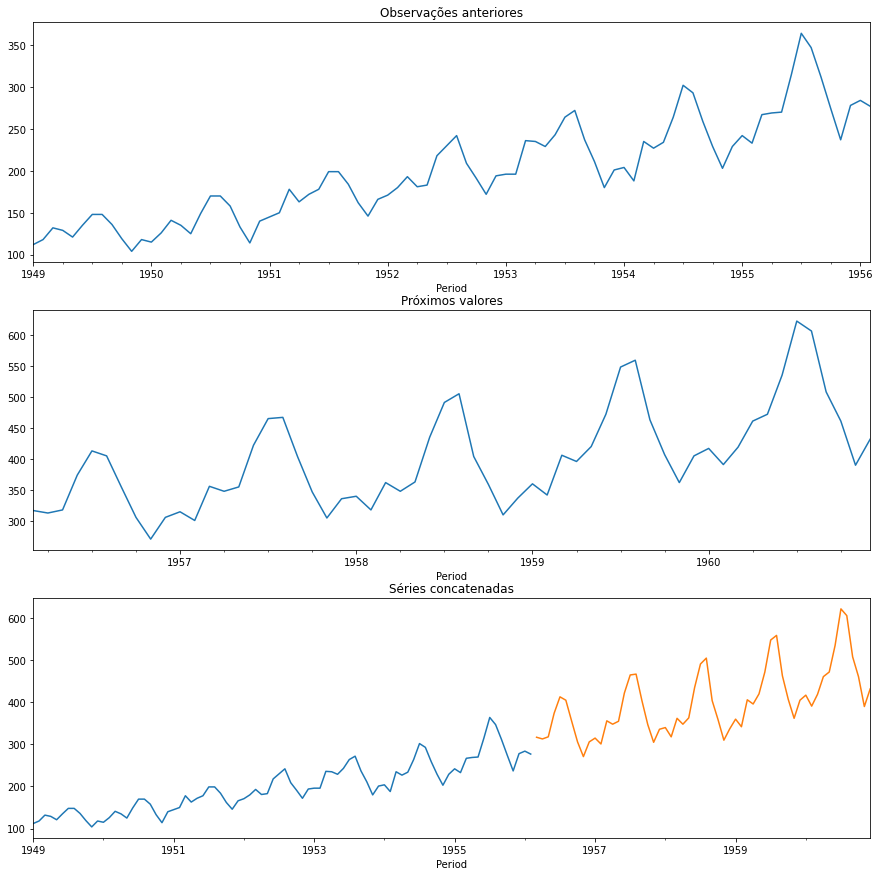

In [88]:
#Aqui plotamos os dados divididos para uma melhor visualização
plt.subplots(3,1,figsize=(15,15))

plt.subplot(311)
y_train.plot(title='Observações anteriores')

plt.subplot(312)
y_test.plot(title='Próximos valores')

plt.subplot(313)
y_train.plot(title='Séries concatenadas')
y_test.plot()

plt.show()

In [66]:
#Aqui chamamos a função que calcula o erro do modelo, e criamos uma variavel que irá guardar o erro de cada modelo
mse = MeanSquaredError()
erros = []

Realizando a predição utilizando o theta

In [83]:
fh = np.arange(1, len(y_test) + 1)  # horizonte que queremos fazer a predição
forecaster = ThetaForecaster(sp=12)  # sazonalidade (nesse caso, a frequência é mensal e a sazonalidade é anual)
forecaster.fit(y_train) #comando que realiza o treinamento do modelo
y_pred = forecaster.predict(fh) #realiza a predição(forecast) dos dados futuros
error_theta = mse(y_test, y_pred) #calcula o erro quadratico médio da prediçao realizada pelo modelo
erros.append({"theta":error_theta}) #add o erro desse modelo no vetor de erro
print("Erro Quadratico Médio: ", error_theta)

Erro Quadratico Médio:  0.008809892673676527


[]

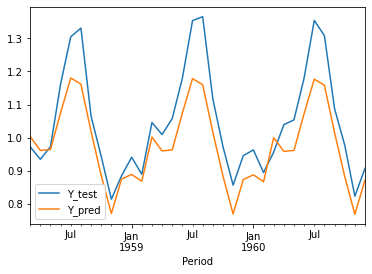

In [84]:
plt.figure()
y_test.plot()
y_pred.plot()
plt.legend(["Y_test","Y_pred"])
plt.plot()
#plota o valor que foi predito pelo modelo(azul) e o valor real

Realizando a predição utilizando o ExponentialSmoothing

In [81]:
model = ExponentialSmoothing(
    y_train,
    trend='mul',
    seasonal='add'
    )#configura o modelo com os hiper parametros necessario
# fit model
model_fit = model.fit()#Realiza o treinamento do modelo
# make prediction
y_pred = model_fit.forecast(len(y_test))#Realiza a predição(forecast) de n valores futuros
error_es = mse(y_test, y_pred)
erros.append({"es":error_es})
print("Erro Quadratico Médio: ", error_es)

Erro Quadratico Médio:  0.06339062768334375


[]

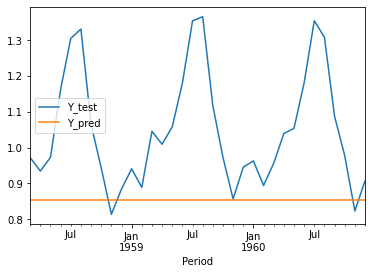

In [82]:
plt.figure()
y_test.plot()
y_pred.plot()
plt.legend(["Y_test","Y_pred"])
plt.plot()

ARIMA

In [74]:
dt_sem_trend = (y / y.rolling(12).mean()) #Remove a tendencia do sinal
y_train, y_test = temporal_train_test_split(dt_sem_trend.dropna())#faz a divisão novamente dos dados 

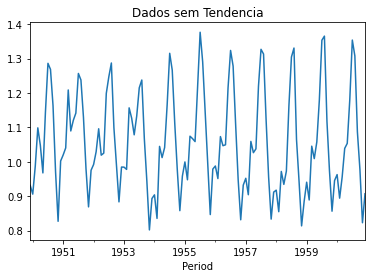

In [56]:
dt_sem_trend.dropna().plot(title="Dados sem Tendencia")#plota os dados sem a tendencia

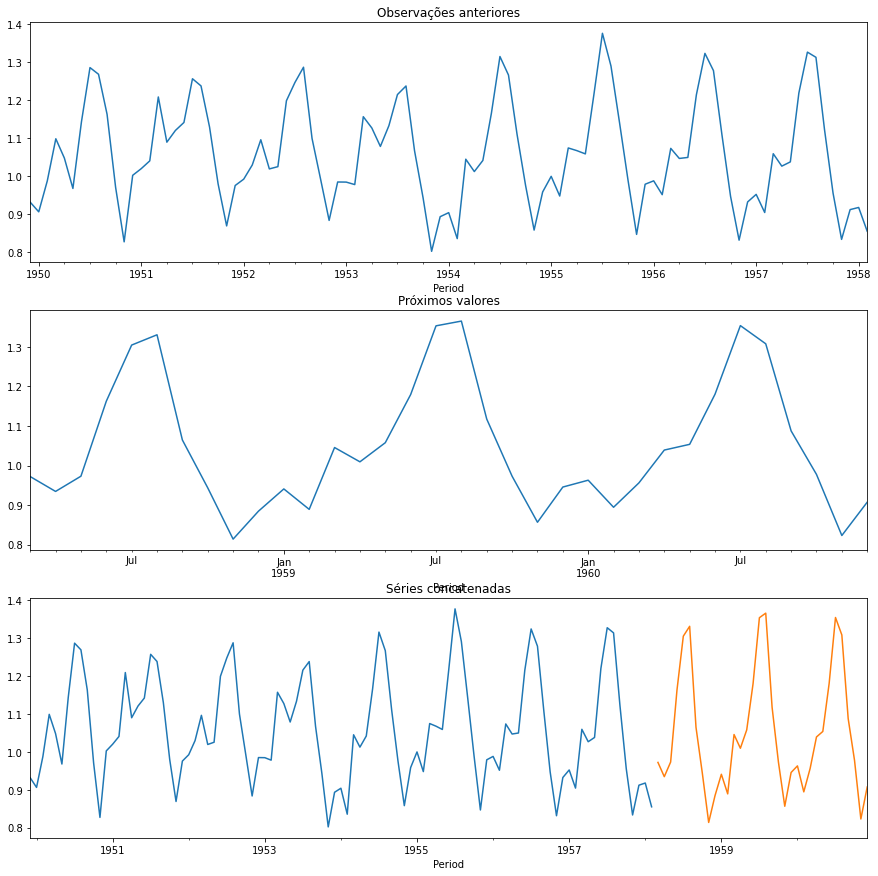

In [57]:
plt.subplots(3,1,figsize=(15,15))

plt.subplot(311)
y_train.plot(title='Observações anteriores')

plt.subplot(312)
y_test.plot(title='Próximos valores')

plt.subplot(313)
y_train.plot(title='Séries concatenadas')
y_test.plot()

plt.show()

In [92]:
model = ARIMA(y_train, order=(15, 0, 0)) #Configura o modelo com os dados de treinos e o hiperparametros necessário
model_fit = model.fit()#Realiza o treino do modelo
y_pred = model_fit.forecast(len(y_test))#faz a predição(forecast) de n valores futuros 
error_ar = mse(y_test, y_pred)#calcula o erro
erros.append({"arima":error_ar})
print("Erro Quadratico Médio: ", error_ar)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Erro Quadratico Médio:  8764.318452392305


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
print(model_fit.summary())

[]

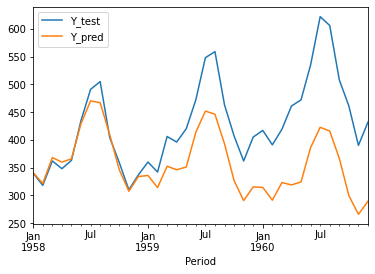

In [93]:
plt.figure()
y_test.plot()
y_pred.plot()
plt.legend(["Y_test","Y_pred"])
plt.plot()

Demonstrando os erros

In [76]:
erros

[{'theta': 0.008809892673676527},
 {'es': 0.009006322600246993},
 {'arima': 0.002076124251593789},
 {'theta': 2470.2427441127447},
 {'es': 2316.084642866602},
 {'arima': 0.002076124251593789}]